**Implementação de um filtro FIR**

* Aluno: José Ívines Matos Silva
* Professor: Edmar Candeia Gurjão
* Processamento digital de Sinais

In [457]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.io import wavfile
from scipy.signal import remez, freqz

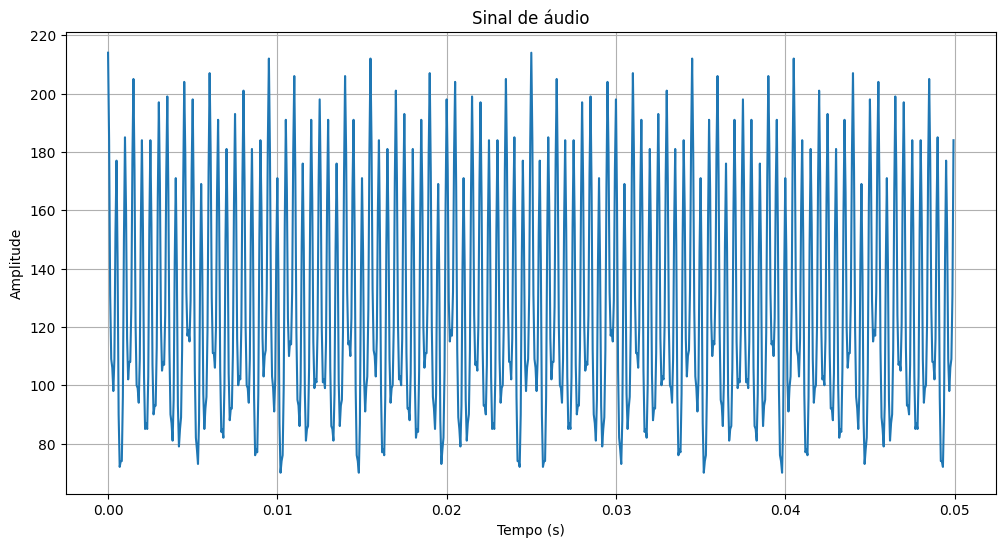

In [458]:
t_amostragem, sinal = wavfile.read('sinal_1.wav')

temp  = np.linspace(0.0, (1/t_amostragem)*len(sinal), len(sinal))
temp_visual = 0.05 #diminuindo o num de amostras
n_amostras = int(t_amostragem * temp_visual) #Quantidade de amostras a serem plotadas

plt.figure(figsize=(12, 6))
plt.plot(temp[:n_amostras], sinal[:n_amostras])
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal de áudio")
plt.grid()
plt.show()

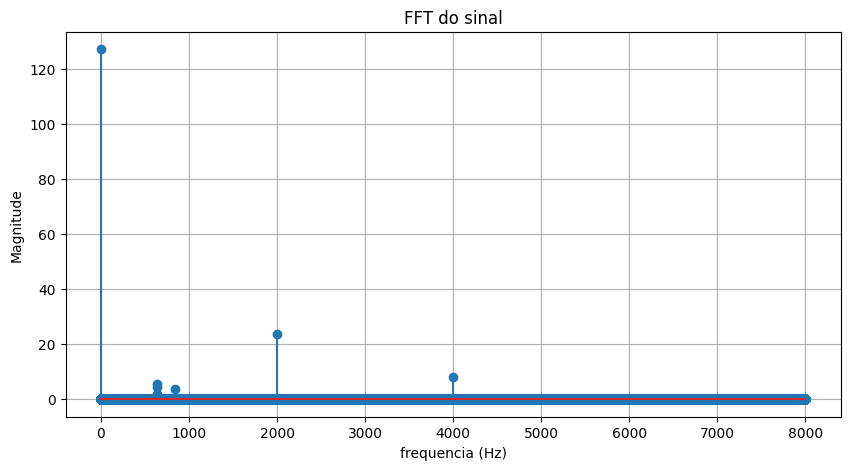

In [459]:
N = len(sinal)

# Calculando a FFT
fft_result = np.fft.fft(sinal)
fft_freqs = np.fft.fftfreq(N, d=1/t_amostragem)

# Pegando apenas a parte positiva da FFT (simetria)
mtde = N // 2
fft_freqs = fft_freqs[:mtde]
fft_magnitude = np.abs(fft_result[:mtde]) / N
# Plot
plt.figure(figsize=(10, 5))
plt.stem(fft_freqs, fft_magnitude)
plt.title('FFT do sinal')
plt.xlabel('frequencia (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


usarei a fft_recursiva abaixo(retirar)




frequencia de cada componente


In [460]:
amplitude = abs(fft_magnitude.flatten())/abs(fft_magnitude.max())
FFT_freq = np.array([])
j = 0
for i in amplitude[:N//2]:
    if (i >= 0.027):
        FFT_freq = np.append(FFT_freq, (j/N)*t_amostragem)
    j += 1
print('frequencia de cada componente: \n', FFT_freq,'Hz ')

frequencia de cada componente: 
 [   0.          639.97795426  640.02805822  839.99298544 2000.
 4000.        ] Hz 


O PRÓXIMO PASSO É APLICAR A TEORIA DE FILTRO FIR(Filtro de Resposta Finita ao Impulso) PARA SEPARAR COMPONENTES DE FREQUÊNCIA

In [461]:
#components de frequencia do sinal:
#frequencias = FFT_freq
frequencias = np.array([640, 840, 2000, 4000])

ANÁLISE DA RESPOSTA EM FREQUENCIA DOS FILTROS

In [462]:
#Plot da resposta em frequencia dos filtros
def Resp_freq_FIR(freq, w, h, edges, figsize=(12,14)):
    fig, axs = plt.subplots(2, 1, figsize=figsize)
    fig.subplots_adjust(hspace=0.2)

    axs[0].plot(w, 20 * np.log10(np.abs(h)), 'g')
    axs[0].set_title(f'Resposta em frequencia do Filtro FIR (Passa-Faixa) {edges[2]} a {edges[3]} Hz')
    axs[0].set_xlabel('frequencia (Hz)')
    axs[0].set_ylabel('Magnitude (dB)')
    axs[0].set_ylim(-70, 5)
    axs[0].grid(True)
    axs[0].axvspan(edges[2], edges[3], color='red', alpha=0.2, label='Banda de passagem(BAND PASS)')
    axs[0].legend(loc='center right')


    phase = np.unwrap(np.angle(h))
    axs[1].plot(w, np.degrees(phase), 'r')
    axs[1].set_xlabel('frequencia (Hz)')
    axs[1].set_ylabel('Fase (graus)')
    axs[1].grid(True)

    plt.savefig(f'FIR_{freq}Hz', bbox_inches='tight')

ANÁLISE NO DOMINIO DO TEMPO

In [463]:
# Função para plotar o sinal filtrado no tempo
def convolucao_filtro(freq, cos_filtrado, temp_visual, t_amostragem):

    n_amostras = int(t_amostragem * temp_visual) # Quantidade de amostras a serem plotadas
    T = 1/t_amostragem #periodo
    time = np.linspace(0, T*len(cos_filtrado), len(cos_filtrado))

    plt.figure(figsize=(12, 6))
    plt.plot(time[:n_amostras], cos_filtrado[:n_amostras], label=f"cos {freq}Hz", color='b')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Sinal de áudio após ser filtrado')
    plt.legend(loc='best')
    plt.xlim(0, temp_visual)
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth=0.8)
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

    plt.savefig(f'SinalFiltrador_{freq}Hz', bbox_inches='tight')

In [464]:
# Função para calcular a FFT do sinal filtrado
def FFT_sinal_filtrado(freq, sinal, t_amostragemm):
    N = len(sinal)

    # Calculando a FFT
    fft_result = np.fft.fft(sinal)
    fft_freqs = np.fft.fftfreq(N, d=1/t_amostragem)

    # Pegando apenas a parte positiva da FFT (por simetria)
    mtde = N // 2
    fft_freqs = fft_freqs[:mtde]
    fft_magnitude = np.abs(fft_result[:mtde]) / N
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(fft_freqs, fft_magnitude, 'b', label=f'cos {freq}Hz')
    plt.title('FFT do sinal filtrado')
    plt.xlabel('frequencia (Hz)')
    plt.ylabel('Magnitude')
    plt.legend(loc='best')
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth=0.8)
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

    plt.savefig(f'FFT_SinalFiltrador_{freq}Hz', bbox_inches='tight')

A SEGUIR, AS COMPONENTES DE 840Hz, 2000 Hz e 4000 Hz SERÃO ATENUADAS PARA QUE O SINAL FIQUE APENAS COM A COMPONENTE DE 640Hz.\
Parâmetros:
*    Filtro passa faixa;
*    Ripple da banda de passagem 10dB;
*    Faixa de passagem 600 a 680 Hz;
*    Atenuação na banda de rejeição-> 60 dB



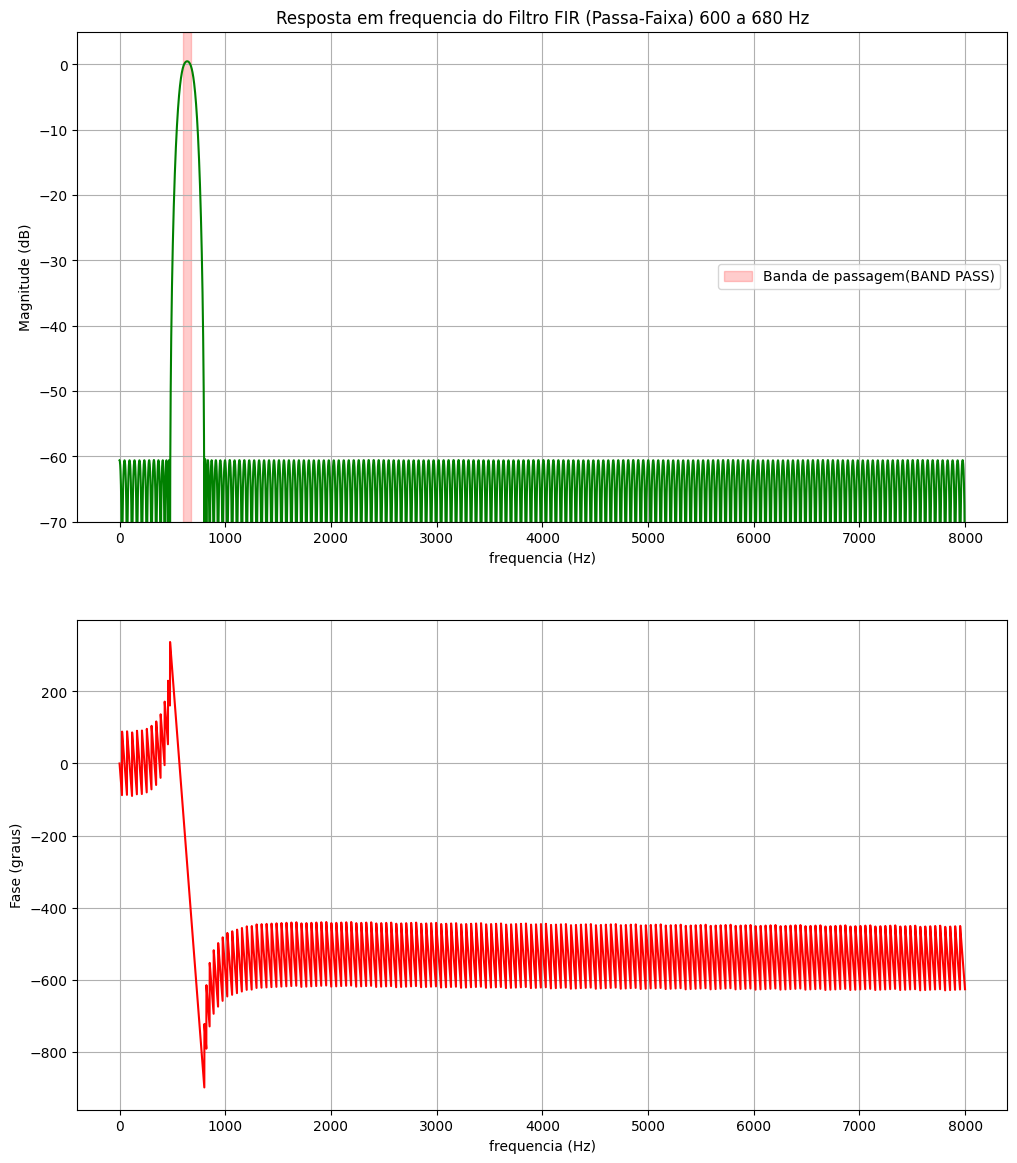

In [465]:
# frequencias normalizadas (0 a 1, onde 1 corresponde a metade da taxa de amostragem)
nyq = t_amostragem / 2

band = [600, 680]
faixa_transi = 120 # Quanto maior a faixa de transição melhor o resultado de atenuação na banda de rejeição
edges = [0, band[0] - faixa_transi, band[0], band[1], band[1] + faixa_transi, 0.5*t_amostragem]

ganho = [0, 1, 0]
peso = [60, 1, 60]
num_taps = 340 # Ampliando a faixa de transição, pode-se obter um filtro adequado e com menor pontos

taps  = remez(num_taps, edges, ganho, weight=peso, fs=t_amostragem)
w, h = freqz(taps, worN=8000, fs=t_amostragem)

Resp_freq_FIR(frequencias[0], w, h, edges)

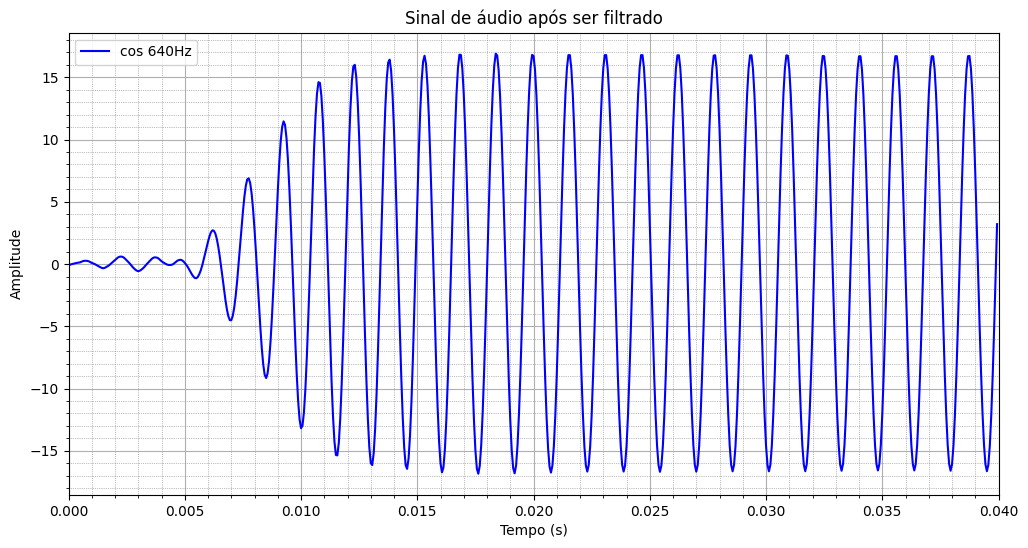

In [466]:
# Convolução no tempo entre os dados de áudio e filtro
cos_filtrado = np.convolve(sinal, taps)


temp_visual = 0.04 # Tempo de visualização, pois há muitas amostras para plotar

convolucao_filtro(frequencias[0], cos_filtrado, temp_visual, t_amostragem)

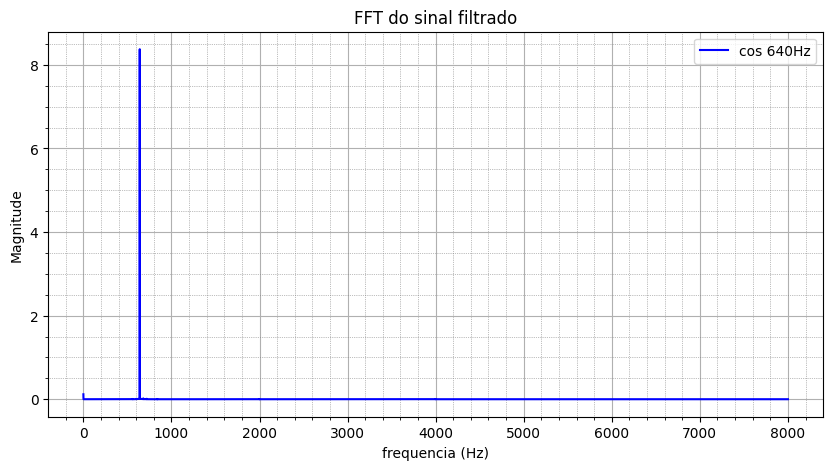

In [467]:
# FFT do Sinal Filtrado
FFT_sinal_filtrado(frequencias[0], cos_filtrado, t_amostragem)

Filtro para atenuar as componentes de 640, 2000 e 4000 Hz

Parâmetros do filtro:

* Filtro passa faixa;
* Ripple da banda de passagem 1dB;
* Faixa de passagem 800 a 880 Hz;
* Atenuação na banda de rejeição 60 dB




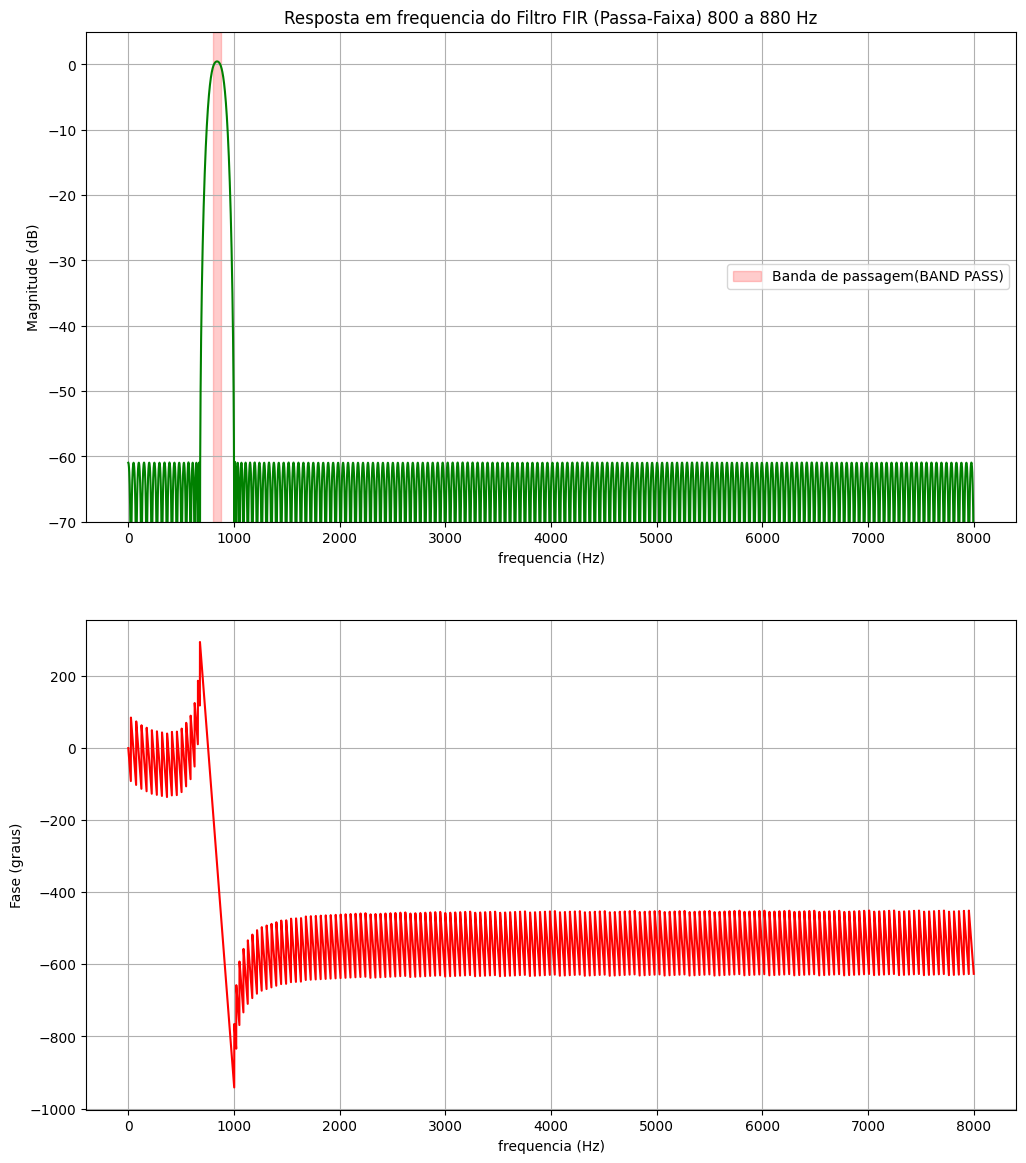

In [468]:
# frequencias normalizadas (0 a 1, onde 1 corresponde a fs/2)
nyq = t_amostragem / 2

band = [800, 880]
faixa_transi = 120 # Quanto maior a faixa de transição melhor o resultado de atenuação na banda de rejeição
edges = [0, band[0] - faixa_transi, band[0], band[1], band[1] + faixa_transi, 0.5*t_amostragem]

ganho = [0, 1, 0]
peso = [60, 1, 60]
num_passos = 340 # Ampliando a faixa de transição, pode-se obter um filtro adequado e com menor pontos

taps  = remez(num_taps, edges, ganho, weight=peso, fs=t_amostragem)
w, h = freqz(taps, worN=8000, fs=t_amostragem)

Resp_freq_FIR(frequencias[1], w, h, edges)

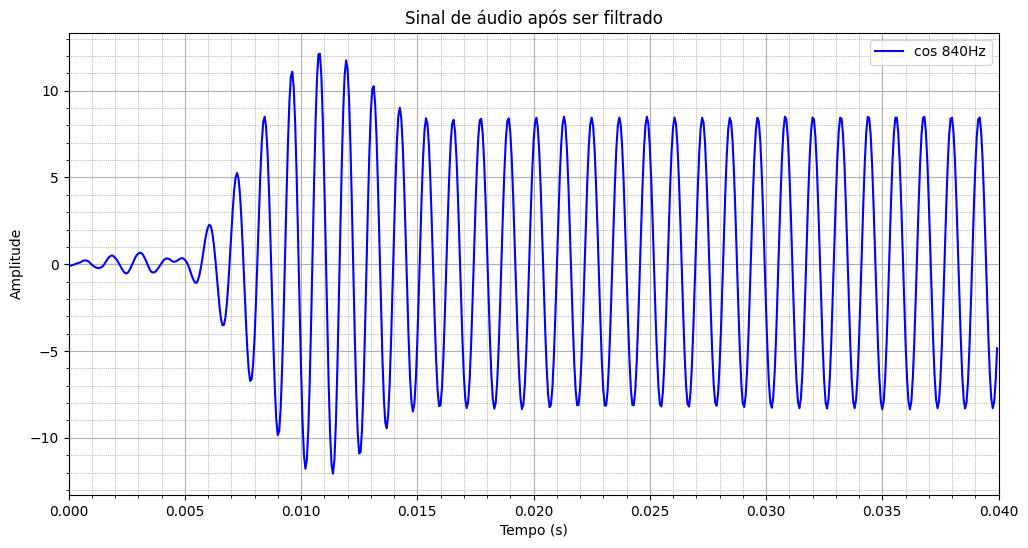

In [469]:
# Convolução no tempo entre os dados de áudio e filtro
cos_filtrado = np.convolve(sinal, taps)

temp_visual = 0.04 # Tempo de visualização, pois há muitas amostras para plotar

convolucao_filtro(frequencias[1], cos_filtrado, temp_visual, t_amostragem)

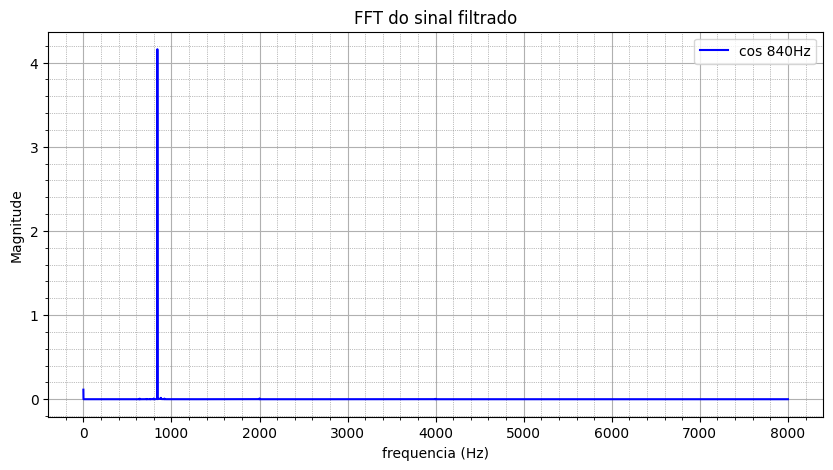

In [470]:
# FFT do Sinal Filtrado
FFT_sinal_filtrado(frequencias[1], cos_filtrado, t_amostragem)

Filtro para atenuar as componentesde frequencia 640 Hz, 840 Hz, 4000 Hz:

Parâmetros do filtro:

* Filtro passa faixa
* Ripple da banda de passagem 1dB
* Faixa de passagem 1500 a 2500 Hz
* Atenuação na banda de rejeição 60 dB

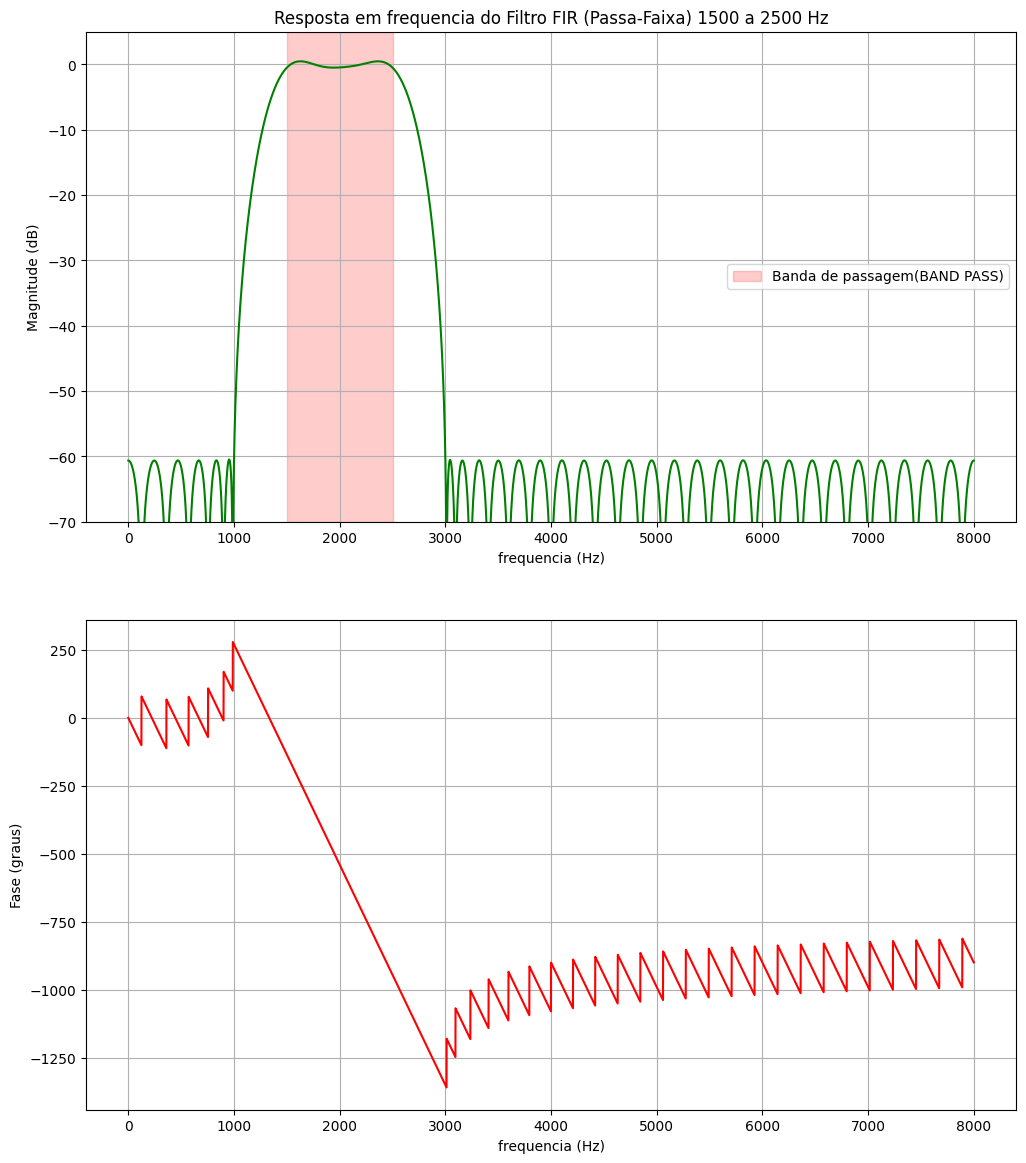

In [471]:
# frequencias normalizadas (0 a 1, onde 1 corresponde a fs/2)
nyq = t_amostragem / 2

band = [1500, 2500]
faixa_transi = 500 # Quanto maior a faixa de transição melhor o resultado de atenuação na banda de rejeição
edges = [0, band[0] - faixa_transi, band[0], band[1], band[1] + faixa_transi, 0.5*t_amostragem]

ganho = [0, 1, 0]
peso = [60, 1, 60]
num_taps = 73 # Ampliando a faixa de transição, pode-se obter um filtro adequado e com menor pontos

taps  = remez(num_taps, edges, ganho, weight=peso, fs=t_amostragem)
w, h = freqz(taps, worN=8000, fs=t_amostragem)

Resp_freq_FIR(frequencias[2], w, h, edges)

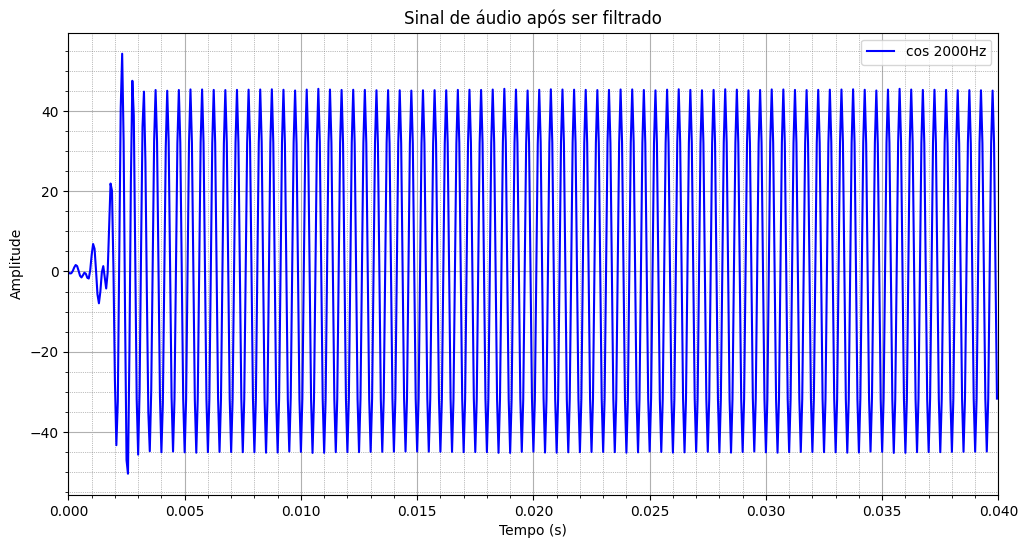

In [472]:
# Convolução no tempo entre os dados de áudio e filtro
cos_filtrado = np.convolve(sinal, taps)

temp_visual = 0.04 # Tempo de visualização, pois há muitas amostras para plotar

convolucao_filtro(frequencias[2], cos_filtrado, temp_visual, t_amostragem)

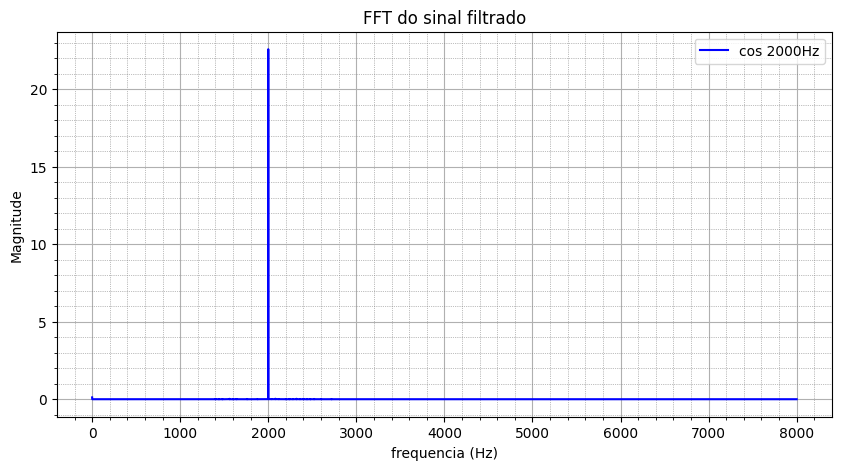

In [473]:
# FFT do Sinal Filtrado
FFT_sinal_filtrado(frequencias[2], cos_filtrado, t_amostragem)



Filtro para atenuar as componentes de 640, 840 e 2000 Hz
Parâmetros do filtro:

* Filtro passa faixa;
* Ripple da banda de passagem 1dB;
* Faixa de passagem 3500 a 4500 Hz;
* Atenuação na banda de rejeição 60 dB

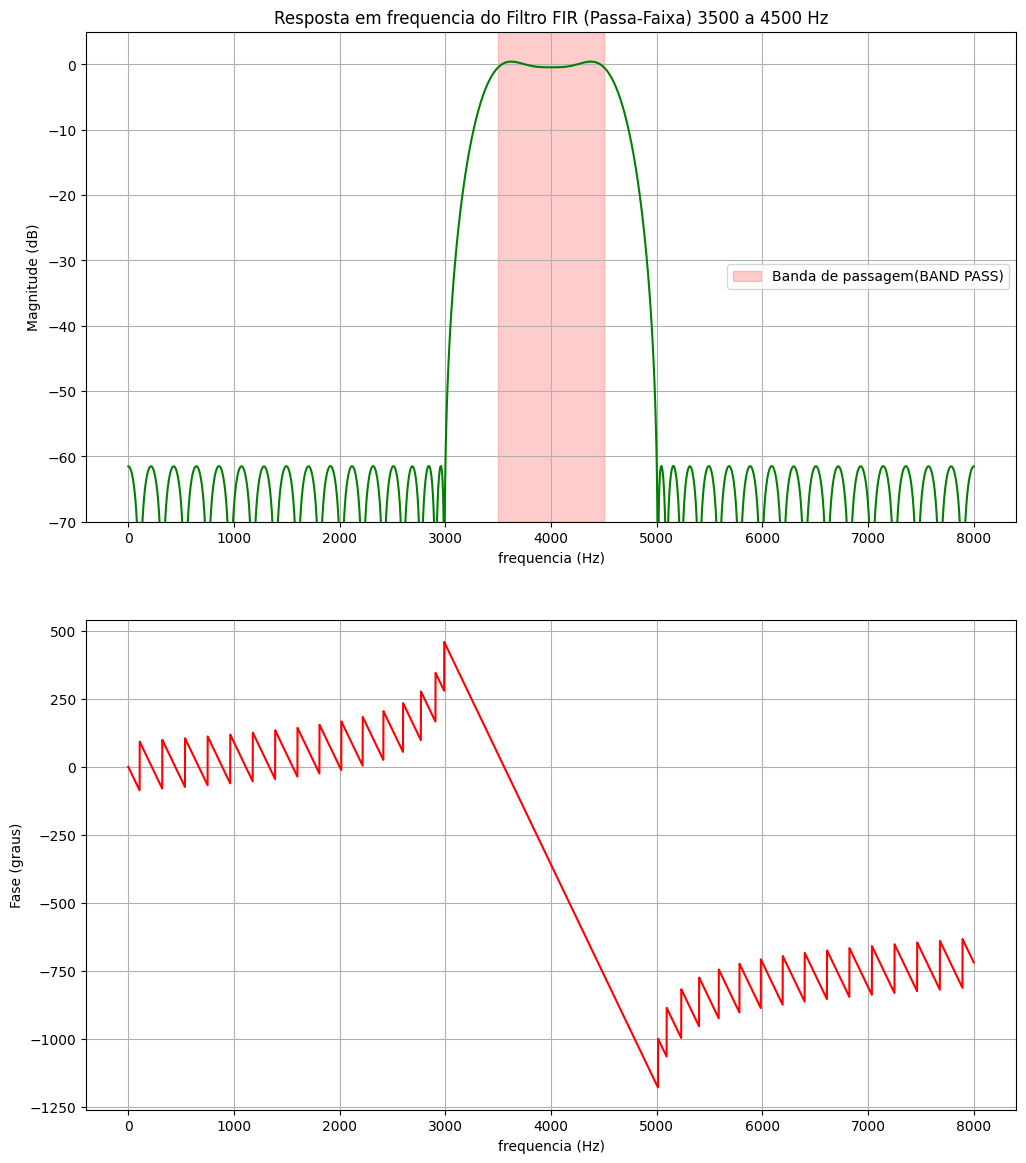

In [474]:
# frequencias normalizadas (0 a 1, onde 1 corresponde a fs/2)
nyq = t_amostragem / 2

band = [3500, 4500]
faixa_transi = 500 # Quanto maior a faixa de transição melhor o resultado de atenuação na banda de rejeição
edges = [0, band[0] - faixa_transi, band[0], band[1], band[1] + faixa_transi, 0.5*t_amostragem]

ganho = [0, 1, 0]
peso = [60, 1, 60]
num_taps = 73 # Ampliando a faixa de transição, pode-se obter um filtro adequado e com menor pontos

taps  = remez(num_taps, edges, ganho, weight=peso, fs=t_amostragem)
w, h = freqz(taps, worN=8000, fs=t_amostragem)

Resp_freq_FIR(frequencias[3], w, h, edges)

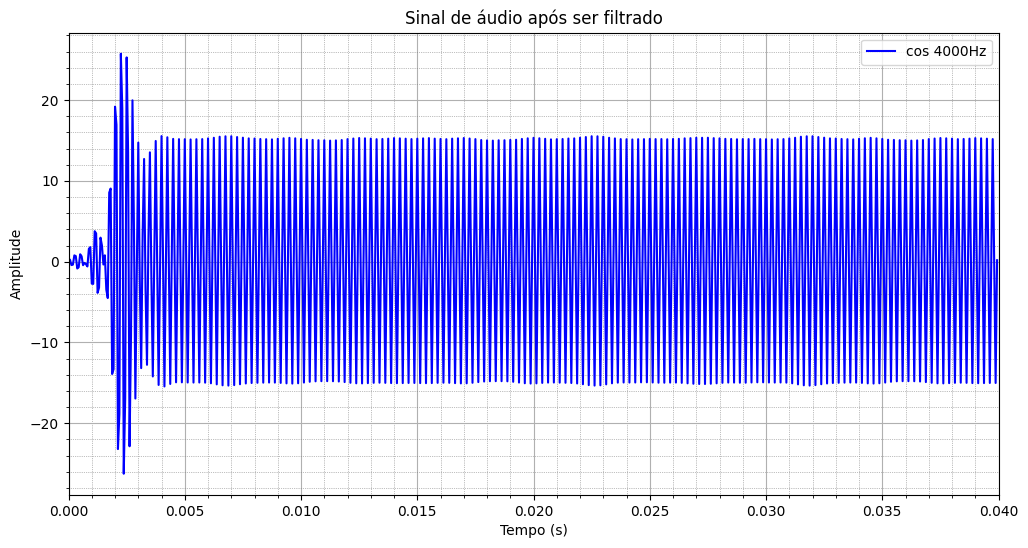

In [475]:
# Convolução no tempo entre os dados de áudio e filtro
cos_filtrado = np.convolve(sinal, taps)

temp_visual = 0.04 # Tempo de visualização, pois há muitas amostras para plotar

convolucao_filtro(frequencias[3], cos_filtrado, temp_visual, t_amostragem)

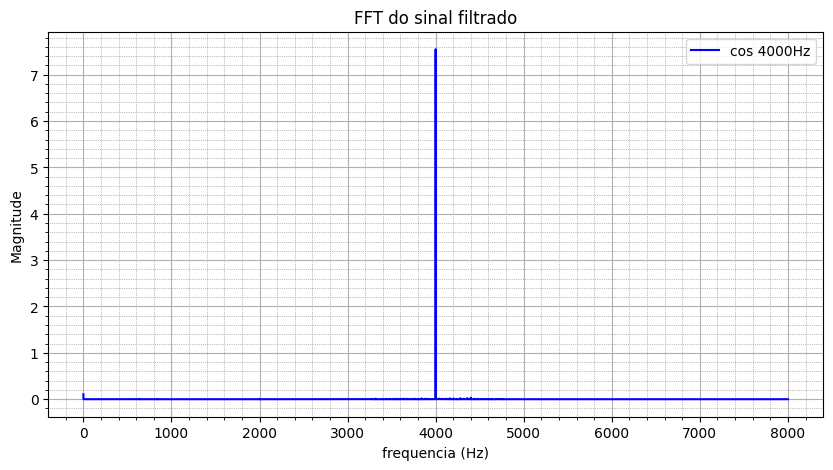

In [476]:
# FFT do Sinal Filtrado
FFT_sinal_filtrado(frequencias[3], cos_filtrado, t_amostragem)